# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [61]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [2]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [3]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather_alldata = pd.concat([weather1, weather2], ignore_index=True) 

In [4]:
# TODO: view first 5 rows of your data
weather_alldata.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [5]:
# TODO: describe your numeric columns
weather_alldata.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [6]:
# TODO: display the null values in your dataframe
weather_alldata.isnull().sum()

year           0
rain_max       0
temp_avg       0
temp_max       0
temp_min       0
hum_max        0
hum_min        0
wind_max       0
wind_avg       0
subdivision    0
dtype: int64

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

The average temperature in Minas Gerais has shown a decrease trend over the years. As shown in the line plot below, "Average Temperature Over Years", there was an increase in average temperature leading up to 2007, followed by a sudden drop. While there has been slight improvements since then, the overeall trend is downward. There is a negative slope that is approximately -0.03989 Celsius per year, supporting the conclusion that the average temperature has a long term gradual decrease over time. 

Slope: -0.039894668990801886, Intercept: 101.65364172094934


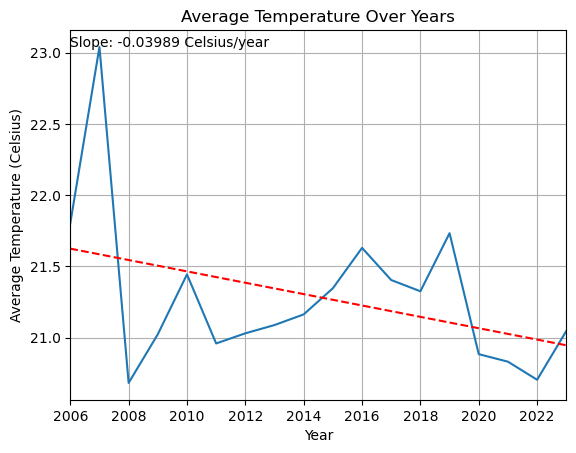

In [ ]:
### Exploring Temp over Time (Year)

# Group the weather data by year and calculate the mean temperature for each year.
"""
    Group the DataFrame by the 'year' column.
    For each group (i.e., each year), calculate the mean of the 'temp_avg' values.
    This produces a new DataFrame where each row represents a year and its corresponding average temperature.
    The 'reset_index()' call turns the resulting Series back into a DataFrame with 'year' as a regular column (instead of an index).
"""
avg_temp_by_year = weather_alldata.groupby('year')['temp_avg'].mean().reset_index()

avg_temp_by_year['year'] = avg_temp_by_year['year'].astype(int) # Convert years from float to interger

# Trendline (y= mx+b) using NumPy
"""
    Fit a linear trendline using NumPy to identify the overall direction of temperature change over the years.
    np.polyfit() calculates the best-fitting line (least squares regression) through the average temperature data.
    The result `z` contains the slope and intercept of the line: y = mx + b.
    We then use np.poly1d() to create a polynomial function `p` from the coefficients,
    which allows us to easily compute the trendline values for plotting.
"""
z = np.polyfit(avg_temp_by_year['year'], avg_temp_by_year['temp_avg'], 1)
p = np.poly1d(z)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Create a line plot to visualize the average temperature over the years.
sns.lineplot(data=avg_temp_by_year, x='year', y='temp_avg')
plt.plot(avg_temp_by_year['year'], p(avg_temp_by_year['year']), color='red', linestyle='--')
plt.title('Average Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Celsius)')
plt.text(x=avg_temp_by_year['year'].min(), 
         y=avg_temp_by_year['temp_avg'].max(),
         s=f"Slope: {slope:.5f} Celsius/year") # Display the trendline slope
plt.xlim(avg_temp_by_year['year'].min(), avg_temp_by_year['year'].max()) # Set x-axis limits to the range of years in the data
plt.grid()
plt.show()



How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

The minimum humidity in Minas Gerais shows a decreasing trend over the years. As illustrated in the line graph “Minimum Humidity Over Years in Minas Gerais”, the regression line has a negative slope of approximately -0.2045% per year, indicating an overall decline in minimum humidity during the period studied.

Similar to the average temperature trend, there are brief periods where minimum humidity slightly increases, but these are typically followed by steeper declines. Notable periods with such fluctuations occur around 2007, 2008–2010, 2013–2014, and 2020–2021. 

Slope: -0.20445022852001024, Intercept: 460.3930239982764


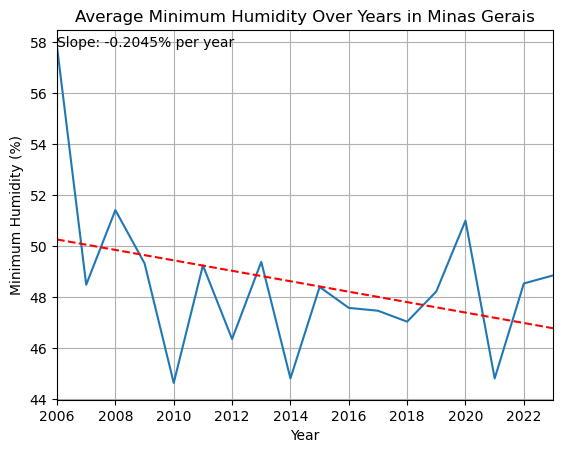

In [ ]:
# Group by year and calculate mean of minimum humidity
min_hum_by_year = weather_alldata.groupby('year')['hum_min'].mean().reset_index()

# Convert year to int 
min_hum_by_year['year'] = min_hum_by_year['year'].astype(int)

# Fit linear trendline
z = np.polyfit(min_hum_by_year['year'], min_hum_by_year['hum_min'], 1)
p = np.poly1d(z)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Create a line plot to visualize the minimum humidity over the years.
sns.lineplot(data=min_hum_by_year, x='year', y='hum_min')
plt.plot(min_hum_by_year['year'], p(min_hum_by_year['year']), color='red', linestyle='--')
plt.title('Average Minimum Humidity Over Years in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Minimum Humidity (%)')
plt.grid()
plt.text(x=min_hum_by_year['year'].min(), 
         y=min_hum_by_year['hum_min'].max(), 
         s=f"Slope: {slope:.4f}% per year")  # Display the trendline slope
plt.xlim(min_hum_by_year['year'].min(), min_hum_by_year['year'].max()) # Set x-axis limits to the range of years in the data
plt.show()

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

The average wind speed in Minas Gerais shows a decreasing trend over the years. As displayed in the line plot below, titled “Average Wind Speed Over Years in Minas Gerais”, the red dashed regression line emphasizes this downward pattern. The slope of the regression line is approximately -0.0713 meters per second per year, indicating that wind speeds have been gradually declining over time. This negative trend is consistent with the patterns observed in the previous line plots for temperature and humidity.

Slope: -0.0712621292452053, Intercept: 144.84385433300037


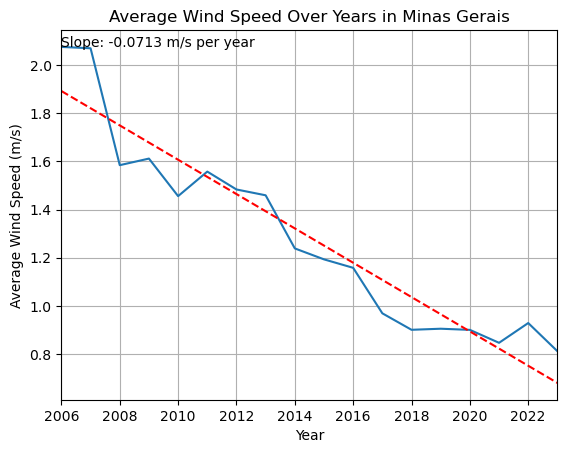

In [ ]:
# Group data by year and calculate average wind speed
avg_wind_by_year = weather_alldata.groupby('year')['wind_avg'].mean().reset_index()

# Fit linear regression trendline
z = np.polyfit(avg_wind_by_year['year'], avg_wind_by_year['wind_avg'], 1)
p = np.poly1d(z)
slope = z[0]
intercept = z[1]
print(f"Slope: {slope}, Intercept: {intercept}")

# Create a line plot to visualize the average wind speed over the years.
sns.lineplot(data=avg_wind_by_year, x='year', y='wind_avg')
plt.plot(avg_wind_by_year['year'], p(avg_wind_by_year['year']), color='red', linestyle='--')
plt.title('Average Wind Speed Over Years in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (m/s)')
plt.text(x=avg_wind_by_year['year'].min(), 
         y=avg_wind_by_year['wind_avg'].max(), 
         s=f"Slope: {slope:.4f} m/s per year")  # Display the trendline slope
plt.xlim(avg_wind_by_year['year'].min(), avg_wind_by_year['year'].max()) # Set x-axis limits
plt.grid()
plt.show()


Which year had the highest maximum record rainfall?

The year with the highest maximum recorded rainfall is 2006, with 6.671 mm of rainfall.

The year with the highest maximum recorded rainfall is 2006, with 6.671 mm of rainfall.


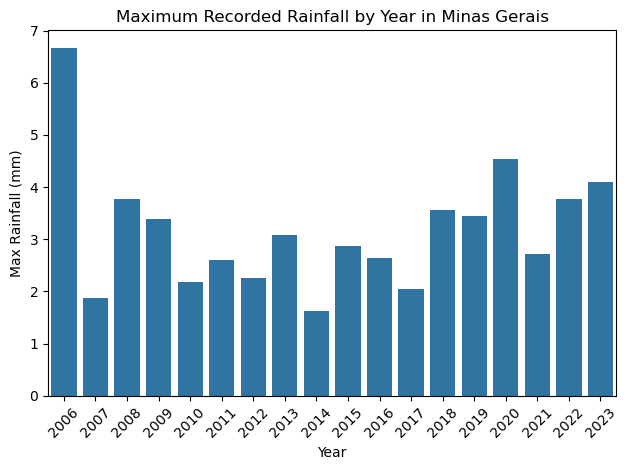

In [62]:
# TODO:
    # Locate the row with the maximum rainfall value in the dataset,
    # Extract/index the value 
    # Display the year and rainfall amount for that record.
    # Create visual by Group the data by year and calculate the maximum rainfall for each year to create a new DataFrame that contains the year and maximum rainfall.

# Find the row with the highest recorded rainfall
max_rainfall_row = weather_alldata.loc[weather_alldata['rain_max'].idxmax()]

# Display the year and the maximum rainfall amount
print(f"The year with the highest maximum recorded rainfall is {int(max_rainfall_row['year'])}, "
      f"with {round(max_rainfall_row['rain_max'],4)} mm of rainfall.")

# Create Visualization
# Group data by year and calculate the maximum rainfall for each year
max_rain_by_year = weather_alldata.groupby('year')['rain_max'].max().reset_index()

# Create a bar plot to visualize the maximum rainfall by year
sns.barplot(data=max_rain_by_year, x='year', y='rain_max')
plt.title('Maximum Recorded Rainfall by Year in Minas Gerais')
plt.xlabel('Year')
plt.ylabel('Max Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

What is the relationship between max rain and max humidity? How *strong* is this relationship? Use pearson's correlation coefficient.

To explore the relationship between maximum rainfall and maximum humidity in Minas Gerais, several methods were used:

1. Pearson’s Correlation Coefficient:
The Pearson correlation coefficient was calculated to measure the strength and direction of the linear relationship between the two variables. The result was r = 0.4058 with a p-value = 0.0948.
This indicates a moderate positive correlation, but since the p-value is greater than 0.05, the result is not statistically significant—meaning we can't confidently say the correlation didn’t occur by chance.

2. Scatter Plot with Regression Line:
A seaborn regplot was used to visually inspect the relationship between rain_max and humidity_max. The upward-sloping regression line suggests a positive relationship, meaning that as maximum humidity increases, maximum rainfall also tends to increase.

3. The heatmap uses a diverging color palette where:
- Dark blue indicates a positive correlation closer to +1,
- Dark red indicates a negative correlation closer to -1,
- Colors near white or lighter shades indicate correlations near zero (no strong relationship).
The diagonal values (rain_max with rain_max and hum_max with hum_max) are dark blue (+1), as expected being that each variable correlates with itself. The correlation between rain_max and hum_max is approximately 0.41 and also appears as dark blue, showing a moderate positive relationship.

The relationship between maximum rainfall and maximum humidity is positive. In other words, when rainfall is higher, humidity tends to be higher too. Using the Pearson correlation coefficient, this relationship to be moderate (about 0.41), which shows some connection but not a very strong one. The regression plot confirmed this positive trend, and the heatmap helped us see how this relationship compares with others in the data.

Overall, the Pearson correlation gave us a clear number to understand the strength, while the plots helped visualize it.

Pearson correlation coefficient: 0.4058, p-value: 0.0948
The correlation is not statistically significant.


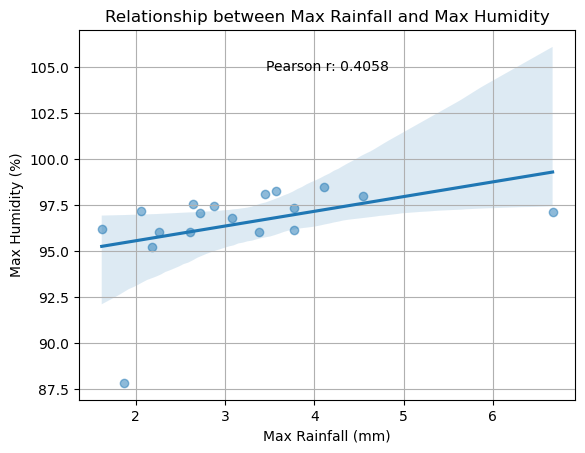

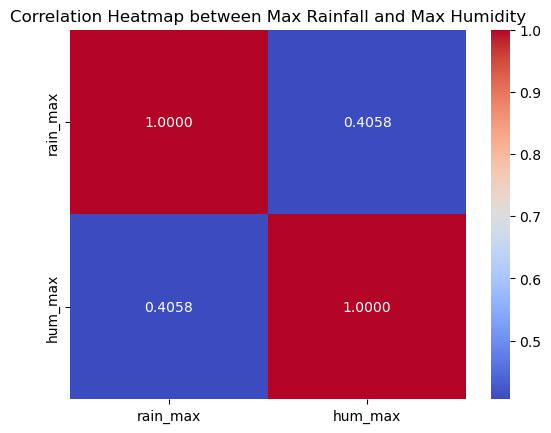

In [56]:
"""
To analyze the relationship between maximum rainfall and maximum humidity, multiple methods were used.

To calculate the Pearson correlation coefficient to quantify the strength and direction of the linear relationship between these two variables. 
The Pearson correlation coefficient (r) ranges from -1 to +1:
- r = +1 indicates a perfect positive linear relationship,
- r = -1 indicates a perfect negative linear relationship,
- r = 0 indicates no linear relationship.

Additionally, scatter plots, regression plots, and a heatmap were used to visually explore and confirm the nature of the relationship. 
Each method has its benefits:
- Pearson correlation coefficient provides a numerical measure of linear association.
- Scatter and regression plots visualize data points and trends, helping to show linearity or outliers.
- Heatmaps show a compact visual summary of correlations among multiple variables for quick comparisons.

Combining these approaches allow for quantitative and visual insights into how maximum rainfall and maximum humidity interact.
"""
### Calculate Pearson correlation coefficient 
# Extract the data 
rain_max = weather_alldata['rain_max']
humidity_max = weather_alldata['hum_max']

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(rain_max, humidity_max)

# Display the results
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

### Scatter plot to visualize the relationship 
    # Using sns.regplot allows to see the scatter points and the regression line automatically fitted to the data.
    # While sns.scatterplot would only show the points without the regression line.
    # scatter_kws={'alpha':0.5} makes the points semi-transparent, which can help in visualizing overlapping points.
sns.regplot(x='rain_max', y='hum_max', data=weather_alldata, scatter_kws={'alpha':0.5})
plt.title('Relationship between Max Rainfall and Max Humidity')
plt.xlabel('Max Rainfall (mm)')
plt.ylabel('Max Humidity (%)')
plt.text(x=0.5, y=0.9, s=f"Pearson r: {pearson_corr:.4f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

# Heatmap
# Create a correlation matrix for the relevant columns
corr_matrix = weather_alldata[['rain_max', 'hum_max']].corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Heatmap between Max Rainfall and Max Humidity')
plt.show()

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use pearson's correlation coefficient.

The relationship between average wind speed and average temperature in Minas Gerais is a moderate positive correlation, with a Pearson correlation coefficient of approximately 0.48. This indicates that as the average wind speed increases, the average temperature tends to increase as well. The correlation is statistically significant (p-value = 0.0456), meaning the observed relationship is unlikely due to random chance.

The scatterplot with the regression line also supports this positive trend, showing an upward slope. Additionally, the heatmap of correlations confirms this moderate positive relationship between average wind speed and average temperature, consistent with the Pearson correlation results.

Pearson correlation coefficient: 0.4765, p-value: 0.0456
The correlation is statistically significant.


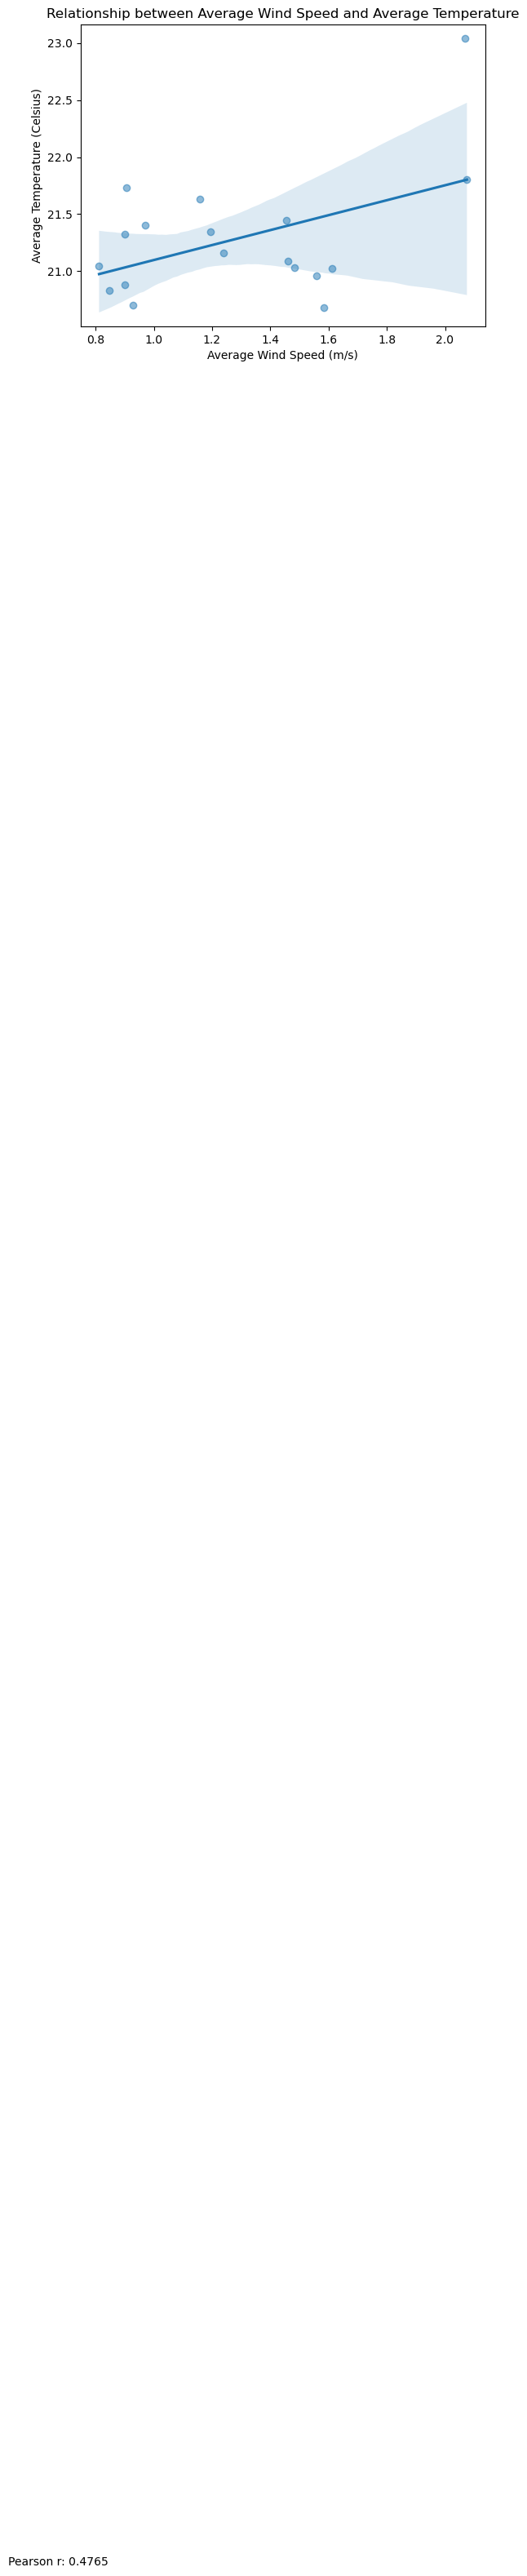

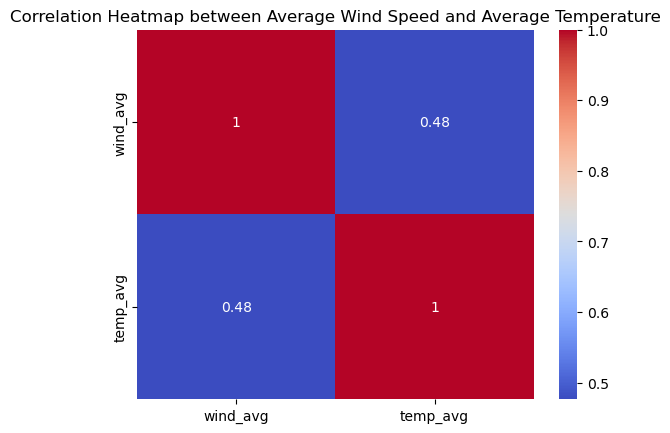

In [60]:
""" The same analysis was performed for the relationship between average wind speed and average temperature asthe previous question"""

### Calculate pearson correlation coefficient and p-value
# Extract the relevant data 
wind_avg = weather_alldata['wind_avg']
avg_temp = weather_alldata['temp_avg']
pearson_corr, p_value = pearsonr(wind_avg, avg_temp)

# Display the results
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {p_value:.4f}")   

# Interpret the results
if p_value < 0.05:
    print("The correlation is statistically significant.")  
else:
    print("The correlation is not statistically significant.")

### Scatter plot to visualize the relationship
sns.regplot(x='wind_avg', y='temp_avg', data=weather_alldata, scatter_kws={'alpha':0.5})
plt.title('Relationship between Average Wind Speed and Average Temperature')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Average Temperature (Celsius)')
plt.text(x=0.5, y=0.9, s=f"Pearson r: {pearson_corr:.4f}")
plt.show()

### Heatmap
# Create a correlation matrix for the relevant columns
corr_matrix = weather_alldata[['wind_avg', 'temp_avg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Average Wind Speed and Average Temperature')
plt.show()


Final Remarks:

The data analysis of weather data for Minas Gerais showed several key trends over the years. Average temperature, minimum humidity, and average wind speed all show a decreasing trend, as indicated by the negative slopes in their respective regression lines. The year with the highest recorded maximum rainfall was identified, and correlation analyses between variables such as maximum rainfall and maximum humidity, as well as average wind speed and average temperature, suggest moderate positive relationships. Notably, the Pearson correlation coefficient between average wind speed and temperature was statistically significant, indicating a meaningful interaction between these factors.

The analysis of weather data for Minas Gerais is significant because it helps identify important trends and relationships in climate variables such as temperature, humidity, wind speed, and rainfall. This is particularly relevant at it examines how changing weather patterns may affect coffee production in the region. Understanding these climate trends is crucial for farmers, agricultural planners, and policymakers to anticipate impacts on coffee yield, quality, and sustainability. By quantifying how variables like average temperature and wind speed are changing over time, and by examining their correlations, the project aims to support data-driven decisions that can help adapt coffee farming practices to evolving environmental conditions.

However, this analysis has several limitations. The dataset contains some missing values, which may affect the accuracy and overall completeness of the results. Additionally, the data’s temporal resolution is limited, sometimes showing years as decimal values rather than whole numbers, which reduces precision when identifying exact trends or events. The correlation methods used, including Pearson’s coefficient, assume linear relationships and may not fully capture more complex interactions between variables. Furthermore, this exploratory analysis does not account for other important factors such as seasonal variations or extreme weather events like droughts or hurrican season. 

